In [1]:
from rdkit import Chem

In [2]:
mol = Chem.MolFromSmiles("c1cc(ccc1c2c(n(cn2)CC3CC3)c4ccnc(n4)N)F")

In [3]:
mol

In [4]:
from rdkit.Chem.Draw import IPythonConsole

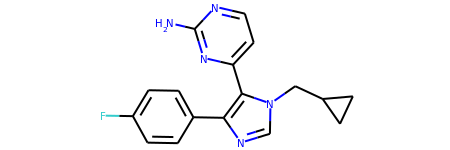

In [5]:
mol

In [6]:
def attach_atom(mol, query, atomic_num):
    result_smiles_list = []
    match_list = mol.GetSubstructMatches(query)
    for idx in [x[0] for x in match_list]:
        new_mol = Chem.RWMol(mol)
        new_idx = new_mol.AddAtom(Chem.Atom(atomic_num))
        new_mol.AddBond(idx, new_idx, order=Chem.rdchem.BondType.SINGLE)
        result_smiles_list.append(Chem.MolToSmiles(new_mol, True))
    return result_smiles_list

In [24]:
res = list(set(attach_atom(mol,Chem.MolFromSmarts('[#6H,#6H2,#6H3]'),6)))

In [25]:
mol_list = [Chem.MolFromSmiles(x) for x in res]

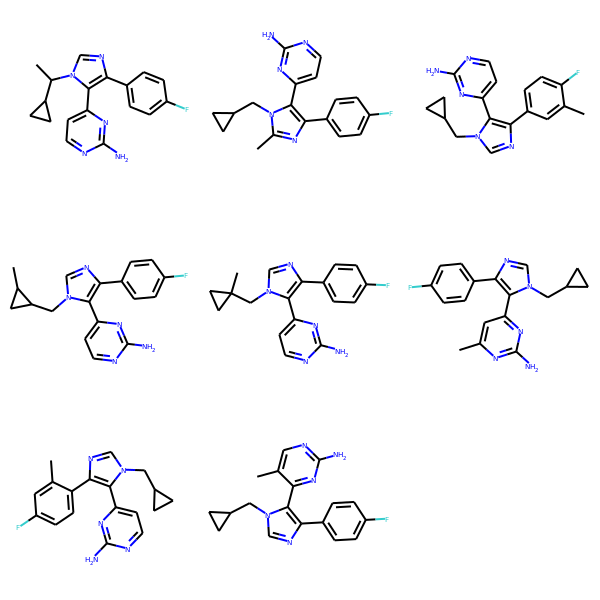

In [26]:
Chem.Draw.MolsToGridImage(mol_list)